# Greetings
The [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) used in this notebook is the results of a survey, which were conducted amongst technology-oriented employees back in 2016.

## Data Pre-processing 
In this section, we make advantage of the findings of the Exploratory Data Analysis (EDA) to fix the problems occurring in the dataset. Subsequently, we'll delve into encoding the data to prepare it for clustering in the next phase.

### List of contents :
1. Data Cleaning
1.1. Slicing the data
1.2. Handling the missing data
2. Features Encoding
3. Summary

Importing the required libraries

In [1]:
from sklearn import preprocessing
from pathlib import Path # Path library for generating OS paths efficiently
import pandas as pd # Data analysis library
import numpy as np # Python library for numerical computation 
import matplotlib.pyplot as plt # The base library for plotting graphs in python

First, let's start by loading the data. 

In [2]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
data = pd.read_csv(f'{path}/data/mental-heath-in-tech-2016_20161114.csv')

# Displaying the data
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
print(f"The data is formed through {data.shape[1]} columns/features and {data.shape[0]} rows/records.")

The data is formed through 63 columns/features and 1433 rows/records.


#### 1. Data Cleaning
Numerous problems were discovered within the dataset such as missing and erroneous data and even inadequate data for the purpose of our case study. 
In this phase, we proceed to clean the data.

We'll start by renaming the columns into short names instead of large questions.

In [4]:
# Here are the new names of the columns 
new_columns_names = [
    'is_self_employed',  # Are you self-employed?
    'organization_size',  # How many employees does your company or organization have?
    'is_tech_company',  # Is your employer primarily a tech company/organization?
    'is_tech_role',  # Is your primary role within your company related to tech/IT? 
    'is_mh_benefits_provided',  # Does your employer provide mental health benefits as part of healthcare coverage?
    'is_aware_mh_care_available', # Do you know the options for mental health care available under your employer-provided coverage?
    'is_mh_discussed_by_employer', # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    'is_mh_resources_provided_by_employer', # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    'is_anonymity_protected', # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    'how_is_asking_for_medical_leave_due_to_mhi', # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be 
    'is_discussing_mhd_with_employer_have_negative_consequences', # Do you think that discussing a mental health disorder with your employer would have negative consequences?
    'is_discussing_phd_with_employer_have_negative_consequences', # Do you think that discussing a physical health disorder with your employer would have negative consequences?
    'is_willing_to_discuss_mhi_with_colleagues', # Would you feel comfortable discussing a mental health disorder with your coworkers?
    'is_willing_to_discuss_mhi_with_direct_supervisor', # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    'is_employer_takes_mh_seriously', # Do you feel that your employer takes mental health as seriously as physical health?
    # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi',
    # Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?
    'have_medical_coverage_includes_mental_health_issue',
    # Do you know local or online resources to seek help for a mental health disorder?
    'know_how_to_seek_help',
    # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    'is_able_to_reveal_previous_mental_health_issue_to_business_contacts',
    # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    'is_impacted_negatively_1',
    # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    'is_able_to_reveal_previous_mental_health_issue_to_coworkers',
    # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    'is_impacted_negatively_2',
    # Do you believe your productivity is ever affected by a mental health issue?
    'is_productivity_impacted',
    # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
    'percentage_impacted',
    # Do you have previous employers?
    'is_previously_employed',
    # Have your previous employers provided mental health benefits?
    'is_previous_employer_provides_mh_benefits',
    # Were you aware of the options for mental health care provided by your previous employers?
    'is_aware_mh_options_by_previous_employer',
    # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    'is_mh_discussed_by_previous_employer',
    # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    'is_mh_resources_provided_by_previous_employer',
    # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    'is_anonymity_protected_by_previous_employer',
    # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    'is_discussing_mhd_with_previous_employer_have_negative_consequences',
    # Do you think that discussing a physical health disorder with previous employers would have negative consequences?
    'is_discussing_phd_with_previous_employer_have_negative_consequences',
    # Would you have been willing to discuss a mental health issue with your previous co-workers?
    'is_willing_to_discuss_mhi_with_previous_colleagues',
    # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    'is_willing_to_discuss_mhi_with_previous_direct_supervisor',
    # Did you feel that your previous employers took mental health as seriously as physical health?
    'is_previous_employer_takes_mh_seriously',
    # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace',
    'is_willing_to_bring_phi_in_interview', # Would you be willing to bring up a physical health issue with a potential employer in an interview?
    'why_or_why_not_bring_phi_in_interview',  # Why or why not?
    'is_willing_to_bring_mhi_in_interview', # Would you bring up a mental health issue with a potential employer in an interview?
    'why_or_why_not_bring_mhi_in_interview',  # Why or why not?
    'is_being_identified_with_mhi_would_hurt_your_career', # Do you feel that being identified as a person with a mental health issue would hurt your career?
    'is_being_identified_with_mhi_would_lower_your_status_among_colleagues', # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    'is_wiling_to_share_about_mhi', # How willing would you be to share with friends and family that you have a mental illness?
    # Have you observed or experienced an unsupported or badly handled response to a mental health issue in your current or previous workplace?
    'previously_observed_experienced_response_to_mhi',
    # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
    'is_less_encouraged_to_reveal_mhi',
    'family_history_of_mhi',  # Do you have a family history of mental illness?
    'previous_history_of_mhi',  # Have you had a mental health disorder in the past?
    'is_having_mhd',  # Do you currently have a mental health disorder?
    'known_conditions',  # If yes, what condition(s) have you been diagnosed with?
    'suspected_conditions',  # If maybe, what condition(s) do you believe you have?
    'diagnosed_by_professional',  # Have you been diagnosed with a mental health condition by a medical professional?
    'diagnosed_conditions_by_professional',  # If so, what condition(s) were you diagnosed with?
    'is_sought_treatment_for_mhi', # Have you ever sought treatment for a mental health issue from a mental health professional?
    'is_mhi_interferes_with_your_work_when_treated_effectively', # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
    'is_mhi_does_not_interfere_with_your_work_when_treated_effectively', # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
    'age',  # What is your age? 
    'gender',  # What is your gender?
    'country_of_residency',  # What country do you live in?'
    'us_state_residency',  # What US state or territory do you live in?
    'country_of_work',  # What country do you work in?
    'us_state_work',  # What US state or territory do you work in?
    'role_description',  # Which of the following best describes your work position?
    'is_remote'  # Do you work remotely?
]

# Setting the columns names in df
data.columns = new_columns_names
data.head()

,is_self_employed,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


#### 1.1 Slicing the data 
As discussed, we only need to keep the data from employees and not self-employed. This would leave the feature useless, therefore, we'll remove it as well.

In [5]:
# Keeping only the rows containing data about employees
raw_df = data[data["is_self_employed"] == 0]

# Removing the feature
df = raw_df.drop(columns=["is_self_employed"], axis=1)

# Overview of the new data
df.head()

,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


Addressing these missing values will help narrow the dataset into only the respondents we seek their responses.

In [6]:
# Let's fill the NaN values with undefined
df["is_tech_role"].replace(np.nan, "undefined", inplace=True)

# The count of our values 0,1, and undefined
df["is_tech_role"].value_counts()

is_tech_role
undefined    883
1.0          248
0.0           15
Name: count, dtype: int64

Based on the role description column, we created the list containing only non-IT-related roles. Upon using this list, we're iterating over the whole dataset and evaluate the roles then assigning if the roles are IT-related or not.

In [7]:
# Saving the non-IT-roles into a list: non_it_roles
non_it_roles = [
    'Supervisor/Team Lead|Other', 'Supervisor/Team Lead|Sales', 'Supervisor/Team Lead|Support', 'Support', 'Executive Leadership|Supervisor/Team Lead|Sales', 'Support|Designer',
    'Support|HR|Supervisor/Team Lead|Executive Leadership', 'Support|Other', 'Sales', 'Executive Leadership|Supervisor/Team Lead|Designer', 'Support|Sales|Designer', 'Other',
    'Supervisor/Team Lead|Executive Leadership', 'Other|Support', 'Other|HR', 'Executive Leadership|Supervisor/Team Lead', 'Designer', 'Supervisor/Team Lead', 'One-person shop',
    'HR|Supervisor/Team Lead|Executive Leadership', 'HR', 'Supervisor/Team Lead|Designer', 'Other|Executive Leadership', 'Executive Leadership', 'Designer|Supervisor/Team Lead',
    'Other|Supervisor/Team Lead', 'Designer|Support|Supervisor/Team Lead'
]

# Filling the values with 0 or 1 based on the role's description
for i in range(1146):
    if df.iloc[i, 60] in non_it_roles:
        df.iloc[i, 2] = 0
    else:
        df.iloc[i, 2] = 1

# Transforming the column data type into integer
df["is_tech_role"] = df["is_tech_role"].astype(int)

# Viewing the end-results
df["is_tech_role"].value_counts()

is_tech_role
1    865
0    281
Name: count, dtype: int64

Consecutively, we'll see the type of companies the respondents work for through a pie chart

In [8]:
# Setting the dataframe raw_1 and the list raw_list_1
df_1 = df[["is_tech_role", "is_tech_company"]].value_counts().reset_index()

list_1 = ["Employees with IT-related role in an IT-related company", 
          "Employees with non-IT-related role in an IT-related company", 
          "Employees with IT-related role in a non-IT-related company",
          "Employees with non-IT-related role in a non-IT-related company"
          ]

# Selecting only 2 columns
df_2 = df_1.iloc[:, 1:]

# Assigning new columns names and values
df_2.columns = ["Categories", "Count"]
df_2["Categories"] = list_1

# Print the dataframe raw_2
df_2.head()

,Categories,Count
0,Employees with IT-related role in an IT-relate...,678
1,Employees with non-IT-related role in an IT-re...,205
2,Employees with IT-related role in a non-IT-rel...,187
3,Employees with non-IT-related role in a non-IT...,76


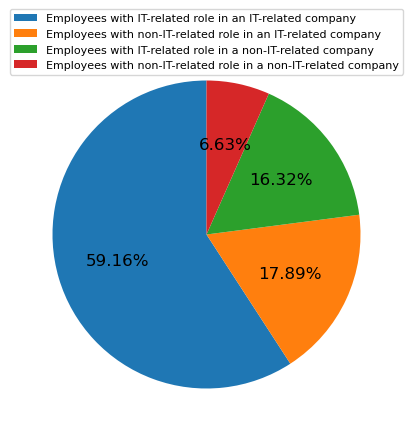

In [9]:
# Setting the style of the visuals
plt.style.use('fast')

# Starting fig1 and ax1 subplots objects
fig1, ax = plt.subplots(figsize=(15, 5))

# Plotting the pie chart
ax.pie(
    df_2["Count"].to_list(),  # List of values
    startangle=90, 
    autopct='%1.2f%%',  # Showing 3 numbers after the decimal point 
    textprops={'fontsize': 12}  # Setting the size of the ratios 
)

# Setting the legend parameters
ax.legend(
    labels=df_2["Categories"].to_list(),  # List of labels
    loc="upper center",  # Position of the legend
    bbox_to_anchor=(0.5, 1.1),
    fontsize=8)  # Size of the legend

# Plotting the figure
plt.show()

Since we consider only records of employees in IT-related roles, the remaining records shall be excluded.

In [10]:
# Selecting only IT-related roles
df = df[df["is_tech_role"] == 1]

# Dropping the is_tech_role column
df.drop(columns=["is_tech_role"], inplace=True)

# Printing the dataframe df
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


#### 1.2. Handling the missing data
The dataset contains missing data that needs to be addressed by either dropping those records or properly filling in the missing values.

The first step involves dropping columns that are entirely empty and do not contribute any meaningful information, but before that, we define a function __dataset_describer()__ which will help us along the way.

In [11]:
def dataset_describer(dataframe):
    """
    parameters :
    dataframe : Any pandas dataframe.
    return:
    described : the empty values, unique values and, list of this unique values along with their datatypes of the given dataframe's columns. 
    """
    # Initiating an empty list data_info 
    data_info = []

    # Gathering the attributes in one place 
    for col in dataframe.columns:
        attributes = {
            # The name of the column
            'name': col,

            # The number of empty values in a column
            'empty_values': dataframe[col].isna().sum(),

            # The number of unique values
            'number_unique_values': [dataframe[col].unique().__len__() - 1 if dataframe[col].isna().sum() != 0 else dataframe[col].unique().__len__()][0],

            # The list of unique values
            'set_unique_values': [list(set(dataframe[col])) if dataframe[col].unique().__len__() != 1 else "None"][0],

            # The data type of column
            'data_type': dataframe[col].dtypes
        }

        # Filtering to only include features containing empty values  
        data_info.append(attributes)

    # Create a DataFrame from the gathered information
    described = pd.DataFrame(data_info).sort_values(by=['empty_values'], ascending=False)
    
    # Providing the described dataframe as a result of the function
    return described

In [12]:
described_df = dataset_describer(df)
described_df

,name,empty_values,number_unique_values,set_unique_values,data_type
20,is_productivity_impacted,865,0,None,object
14,have_medical_coverage_includes_mental_health_i...,865,0,None,float64
21,percentage_impacted,865,0,None,object
19,is_impacted_negatively_2,865,0,None,object
18,is_able_to_reveal_previous_mental_health_issue...,865,0,None,object
...,...,...,...,...,...
1,is_tech_company,0,2,"[0.0, 1.0]",float64
34,is_willing_to_bring_phi_in_interview,0,3,"[Maybe, Yes, No]",object
36,is_willing_to_bring_mhi_in_interview,0,3,"[Maybe, No, Yes]",object
38,is_being_identified_with_mhi_would_hurt_your_c...,0,5,"[Yes, I think it would, No, I don't think it w...",object


In [13]:
# Storing these columns in a list called: to_be_deleted
to_be_deleted = list(described_df[described_df["empty_values"] == 865].iloc[:, 0])

# Using the list to_be_deleted to drop empty columns
df.drop(columns=to_be_deleted, axis=1, inplace=True)

# Drop text columns with no rewarding piece of information
df.drop(["why_or_why_not_bring_phi_in_interview", "why_or_why_not_bring_mhi_in_interview"], axis=1, inplace=True)

Next, we'll run some transformations to standardize the data within each column along with their datatypes.

In [14]:
# Transforming this column from float64 into binary int64
df['is_tech_company'] = df['is_tech_company'].astype("int64")

# Transforming this column from a text into int64
df[['is_aware_of_previous_negative_consequence_of_colleagues_with_mhi', 'diagnosed_by_professional']] = df[
    ['is_aware_of_previous_negative_consequence_of_colleagues_with_mhi', 'diagnosed_by_professional']].replace(
    ["Yes", "No"], [1, 0])

# Adjusting erroneous inout in the feature
df[["is_employer_takes_mh_seriously", "is_anonymity_protected_by_previous_employer"]] = df[
    ["is_employer_takes_mh_seriously", "is_anonymity_protected_by_previous_employer"]].replace('I don\'t know',
                                                                                               "I don't know")

# Setting the outliers to the median of the age column
df.loc[(df['age'] > 65), 'age'] = df.loc[(df['age'] < 18), 'age'] = df["age"].median()

#  Filling the missing values with the appropriate uncertainty unique values available in each feature
df['is_aware_mh_care_available'].fillna('I am not sure', inplace=True)

df['previously_observed_experienced_response_to_mhi'].fillna("Maybe/Not sure", inplace=True)

df['is_less_encouraged_to_reveal_mhi'].fillna("Maybe", inplace=True)

In [15]:
# Reassigning the values to Male, Female, or Other
df['gender'].replace(
    ['male', 'm', 'M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male', 'Cis Male', 'cis male', 'cis man', 'mail',
     'Male (trans, FtM)', 'Male/genderqueer', 'Malr', 'Man', 'Sex is male', 'man', 'male ', 'M|', 'Male ', 'MALE',
     'Male (trans, FtM)',
     'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? '
     ],
    'Male', inplace=True)

df['gender'].replace(
    ['Female', 'female', 'I identify as female.', 'female ', 'Female assigned at birth ', 'Cis female ', 'F', 'Woman',
     'Transitioned, M2F', 'Female or Multi-Gender Femme', 'woman', 'female/woman', 'Cisgender Female', 'fm', 'f',
     'fem', ' Female', 'Cis-woman', 'Female ', 'Female (props for making this a freeform field, though)',
     ],
    'Female', inplace=True)

df['gender'].replace(
    ['Genderfluid (born female)', 'female-bodied; no feelings about gender', 'non-binary', 'AFAB', 'Agender',
     'genderqueer',
     'Genderflux demi-girl', 'mtf', 'Genderqueer', 'Transgender woman', 'Other/Transfeminine', 'human', 'Queer',
     'Unicorn',
     'Androgynous', 'Fluid', 'nb masculine', 'Genderfluid', 'none of your business', 'Bigender', 'Enby',
     'genderqueer woman',
     'Nonbinary', 'male 9:1 female, roughly', 'Human', np.nan
     ],
    'Other', inplace=True)

# Overview of the transformed data
df["gender"].value_counts()

gender
Male      672
Female    170
Other      23
Name: count, dtype: int64

On the other hand, we'll change the data to fit the other columns to avoid ambiguity.

In [16]:
# Specifying the important columns in a list
concerned_columns = ['is_having_mhd', 'known_conditions', 'suspected_conditions', 'diagnosed_by_professional', 'diagnosed_conditions_by_professional']

# Previewing the error in data
df.loc[(df["is_having_mhd"] != 'No') & (df["known_conditions"].isna()) & (df["suspected_conditions"].isna()), concerned_columns]

,is_having_mhd,known_conditions,suspected_conditions,diagnosed_by_professional,diagnosed_conditions_by_professional
164,Yes,NaN,NaN,0,NaN
574,Yes,NaN,NaN,1,NaN
635,Yes,NaN,NaN,1,"Anxiety Disorder (Generalized, Social, Phobia,..."
714,Maybe,NaN,NaN,0,NaN
765,Maybe,NaN,NaN,0,NaN
1059,Yes,NaN,NaN,1,Attention Deficit Hyperactivity Disorder|Mood ...


In [17]:
# Replacing all the responses with no known or suspected conditions with the appropriate value in the is_having_mhd column
df.loc[(df["is_having_mhd"] != 'No') & (df["known_conditions"].isna()) & (
    df["suspected_conditions"].isna()), "is_having_mhd"] = "No"

# Replacing the response with no diagnosed condition by a professional with the appropriate value in the diagnosed_by_professional column
df.loc[(df["diagnosed_by_professional"] == 1) & (
    df["diagnosed_conditions_by_professional"].isna()), "diagnosed_by_professional"] = 0

# Eliminating the PTSD condition since it's not diagnosed and after being diagnosed by a professional, the respondent didn't include it as a diagnosed condition
df.loc[(df["is_having_mhd"] == "Yes") 
       & 
       (df["known_conditions"] == "Attention Deficit Hyperactivity Disorder|PTSD (undiagnosed)"), "known_conditions"] = "Attention Deficit Hyperactivity Disorder"

Finally, we'll proceed to standardize the mental health conditions available in the dataset.

The function __conditions_counter()__ will help determine the conditions available for us in the dataset.

In [18]:
def conditions_counter(column_name):
    """
    :param column_name: The name of column desired
    :return: a Dataframe containing the conditions and the number of their occurrences in the column
    """

    # Creating the list of unique values excluding empty values
    a_list = pd.DataFrame(df[column_name].value_counts()).reset_index().iloc[:, 0].to_list()

    # Creating an empty dictionary
    a_dict = dict()

    # Initiating a for-loop
    for element in a_list:
        # Inspecting the existence of a character 
        if '|' in element:
            elements = element.split("|")
            # If the condition is met
            for unit in elements:
                # Iterating each unit  
                if unit in a_dict:
                    a_dict[unit] += 1  # Augment the number if it does exist
                else:
                    a_dict[unit] = 1  # Set the number to 1 if a new occurrence is found
        else:
            if element in a_dict:
                a_dict[element] += 1
            else:
                a_dict[element] = 1

    # Turning the data stored in the dictionary into a dataframe
    dframe = pd.DataFrame(list(a_dict.items()), columns=['Condition', 'Count'])

    # The final output of the function
    return dframe

In [19]:
# Setting the dataframes
known_conditions = conditions_counter("known_conditions")
suspected_conditions = conditions_counter("suspected_conditions")
diagnosed_conditions = conditions_counter("diagnosed_conditions_by_professional")

# Merging the data frames into final_df
conditions_df = pd.merge(
    pd.merge(
        known_conditions,
        suspected_conditions,
        on='Condition', how='outer',
        suffixes=('_known', '_suspected')
    ), diagnosed_conditions, on='Condition', how='outer')

# Replacing empty values
conditions_df[['Count_known', 'Count_suspected', 'Count']] = conditions_df[
    ['Count_known', 'Count_suspected', 'Count']].replace(np.nan, 0)

# Adjusting the data type
conditions_df[['Count_known', 'Count_suspected', 'Count']] = conditions_df[
    ['Count_known', 'Count_suspected', 'Count']].astype('int64')

# Adding a new column called: Total
conditions_df["Total"] = conditions_df["Count_known"] + conditions_df["Count_suspected"] + conditions_df["Count"]
conditions_df.sort_values("Total", ascending=False, inplace=True)

# Renaming te columns for better clarity 
conditions_df.columns = ["Conditions", "Known", "Suspected", "Diagnosed_by_professional", "Total"]

# Print final_df
conditions_df

,Conditions,Known,Suspected,Diagnosed_by_professional,Total
1,"Mood Disorder (Depression, Bipolar Disorder, etc)",49,41,39,129
0,"Anxiety Disorder (Generalized, Social, Phobia,...",50,39,34,123
2,Attention Deficit Hyperactivity Disorder,24,17,17,58
3,Post-traumatic Stress Disorder,23,10,20,53
8,"Personality Disorder (Borderline, Antisocial, ...",15,17,14,46
5,Obsessive-Compulsive Disorder,18,15,11,44
9,Stress Response Syndromes,16,18,7,41
6,Substance Use Disorder,16,9,12,37
7,Addictive Disorder,13,16,7,36
4,"Eating Disorder (Anorexia, Bulimia, etc)",9,6,7,22


As we came across the conditions our respondents mentioned, a standardization was applied to relief redundancy.

In [20]:
# Fixing typos and standardizing terms in 'suspected_conditions' column
df['suspected_conditions'] = df['suspected_conditions'].str.replace('depersonalization disorder', 'Depersonalisation')
df['suspected_conditions'] = df['suspected_conditions'].str.replace('post-partum / anxiety', 'Postpartum Anxiety')

# Fixing typos and standardizing terms in 'diagnosed_conditions_by_professional' column
df['diagnosed_conditions_by_professional'] = df['diagnosed_conditions_by_professional'].str.replace("attention deficit disorder (but not the hyperactive version)", "ADD (w/o Hyperactivity)")

# Standardizing Autism Spectrum conditions
df['known_conditions'] = df['known_conditions'].str.replace("Autism (Asperger's)", 'Autism Spectrum')

df['suspected_conditions'] = df['suspected_conditions'].str.replace("Asperger Syndrome", 'Autism Spectrum')
df['suspected_conditions'] = df['suspected_conditions'].str.replace("Asperger's", 'Autism Spectrum')

df['diagnosed_conditions_by_professional'] = df['diagnosed_conditions_by_professional'].str.replace("Asperger Syndrome", 'Autism Spectrum')
df['diagnosed_conditions_by_professional'] = df['diagnosed_conditions_by_professional'].str.replace("Autism (Asperger's)", 'Autism Spectrum')

# Standardizing Autism Spectrum Disorder conditions
df['known_conditions'] = df['known_conditions'].str.replace("Autism spectrum disorder", 'Autism Spectrum Disorder')

df['diagnosed_conditions_by_professional'] = df['diagnosed_conditions_by_professional'].str.replace("Autism - while not a \"mental illness\", still greatly affects how I handle anxiety", 'Autism Spectrum Disorder')

df['diagnosed_conditions_by_professional'] = df['diagnosed_conditions_by_professional'].str.replace("autism spectrum disorder", 'Autism Spectrum Disorder')

# Replacing the assumption with the right diagnosis
df['known_conditions'] = df['known_conditions'].str.replace("Transgender", "Gender Identity Disorder")

Eventually, we perform an overview on the data we've got left before we save it into a new file __data_v2.0.csv__.

In [22]:
print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

The data is formed through 51 columns/features and 865 rows/records.


In [27]:
# Save the cleansed dataset in the respective directory
df.to_csv(f"{path}/data/data_v2.0.csv", index=False)

### 2. Features Encoding

In [24]:
# print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

In [25]:
# Save the cleansed dataset in the respective directory
# df.to_csv(f"{path}/data/data_v2.0.csv")

# 3. Summary

## Author

<a href="https://www.linkedin.com/in/ab0858s/">Abdelali BARIR</a> is a former veteran in the Moroccan's Royal Armed Forces, and a self taught data scientist. Currently enrolled in BSc. Data Science in IU International University of Applied Sciences.

## Change Log

| Date       | Version | Changed By     | Change Description      |
|------------|---------|----------------|-------------------------|
| 2024-03-10 | 1.0     | Abdelali Barir | Modified markdown       |
|------------|---------|----------------|-------------------------|